# RocketPy Simulation

*Clarkson University Rocketry, 11.4.24*

Simulation for Clarkson University Rocketry's Earendel, a test-bed rocket for a larger-scale version that will be used in the 2025 International Rocket Engineering Competition.  


This notebook was generated using Rocket-Serializer, a RocketPy tool to convert simulation files to RocketPy simulations.


In [43]:
%pip install rocketpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from rocketpy import (
    Environment,
    SolidMotor,
    Rocket,
    Flight,
    TrapezoidalFins,
    EllipticalFins,
    RailButtons,
    NoseCone,
    Tail,
    Parachute,
)
import datetime

## Environment

Location is Upstate Rocketry Research Group (URRG)'s field, in Elma, NY.

In [45]:
env = Environment()
env.set_location(latitude= 42.6925, longitude= 77.1894) # Coordinates for URRG
env.set_elevation(147) # Have not changed

In [46]:
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))
env.set_atmospheric_model(type='Forecast', file='GFS')


Gravity Details

Acceleration of gravity at surface level:    9.7728 m/s²
Acceleration of gravity at  78.955 km (ASL): 9.5410 m/s²


Launch Site Details

Launch Date: 2024-11-05 12:00:00 UTC
Launch Site Latitude: 42.69250°
Launch Site Longitude: 77.18940°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 166021.44 W|E    0.00 N
Launch Site UTM zone: 31N
Launch Site Surface Elevation: 2432.4 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 78.955 km
Forecast Time Period: from 2024-11-04 18:00:00 to 2024-11-20 18:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 28.73 m/s
Surface Wind Direction: 208.73°
Surface Wind Heading: 0.80°
Surface Pressure: 761.86 hPa
Surface Temperature: 278.68 K
Surface Air Density: 0.952 kg/m³
Surface Speed of Sound: 334.66 m/s


Earth Model Details

Earth Radius at Launch site: 

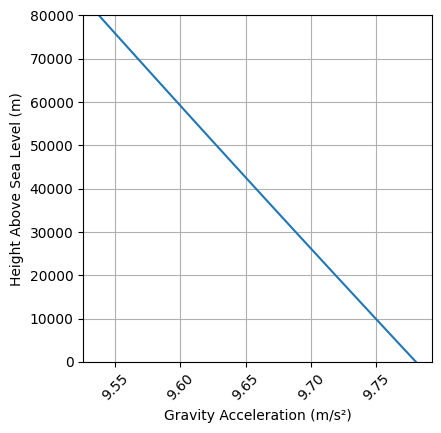



Atmospheric Model Plots


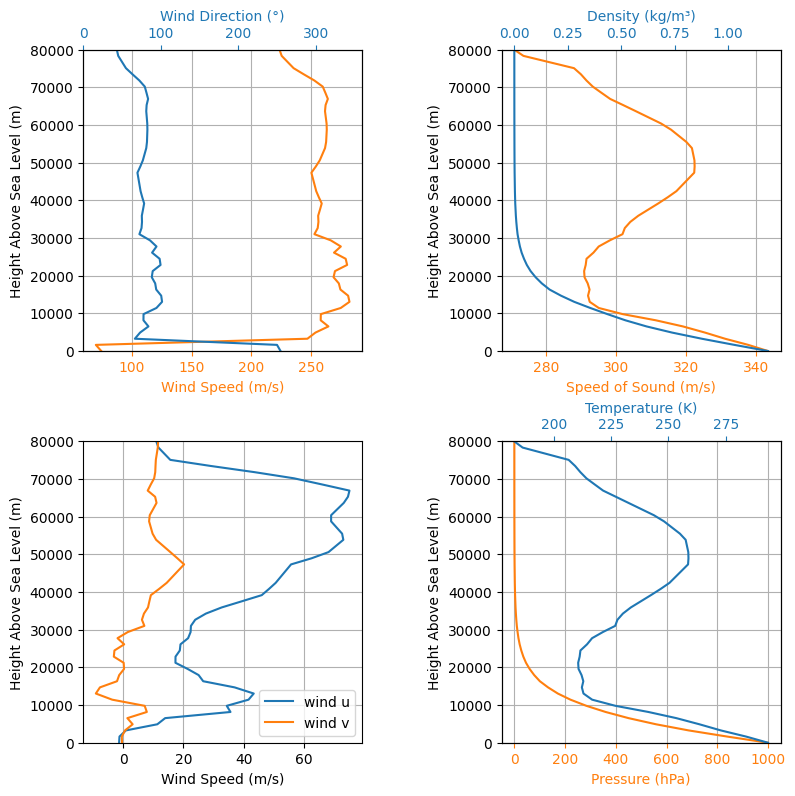

In [47]:
env.all_info()

## Motor
Note: Currently, only Solid Motors are supported by Rocket-Serializer. If you want to use a Liquid/Hybrid motor, please use RocketPy directly.


In [ ]:
motor = SolidMotor(
    thrust_source= "AeroTech_K700W.eng",
    dry_mass=0,
    center_of_dry_mass_position=0,
    dry_inertia=[0, 0, 0],
    grains_center_of_mass_position=0.568/2,
    grain_number=1,
    grain_density=1320.1669706547736,
    grain_outer_radius=0.027,
    grain_initial_inner_radius=0.0135,
    grain_initial_height=0.568,
    grain_separation=0,
    nozzle_radius=0.02025,
    nozzle_position=0,
    throat_radius=0.0135,
    reshape_thrust_curve=False,  # Not implemented in Rocket-Serializer
    interpolation_method="linear",
    coordinate_system_orientation="combustion_chamber_to_nozzle",
)

Nozzle Details
Nozzle Radius: 0.02025 m
Nozzle Throat Radius: 0.0135 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 1320.1669706547736 kg/m3
Grain Outer Radius: 0.027 m
Grain Inner Radius: 0.0135 m
Grain Height: 0.568 m
Grain Volume: 0.001 m3
Grain Mass: 1.288 kg

Motor Details
Total Burning Time: 3.593 s
Total Propellant Mass: 1.288 kg
Average Propellant Exhaust Velocity: 1773.043 m/s
Average Thrust: 635.591 N
Maximum Thrust: 1029.337 N at 0.632 s after ignition.
Total Impulse: 2283.680 Ns



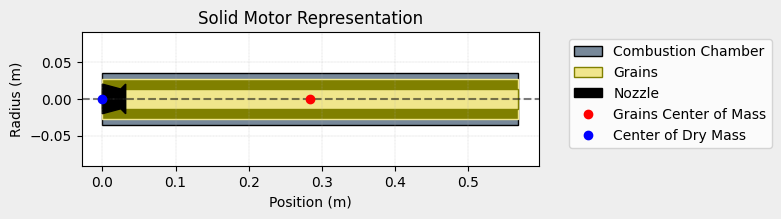

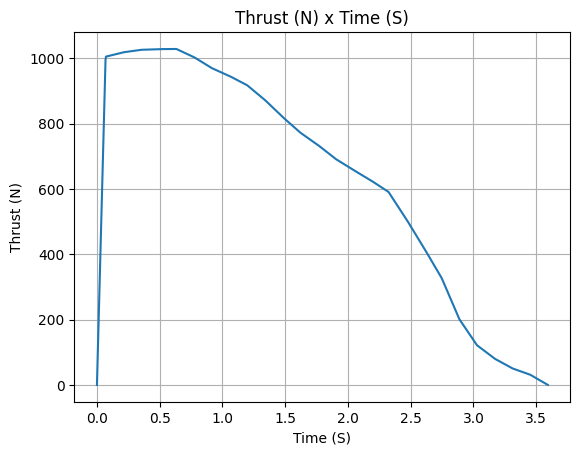

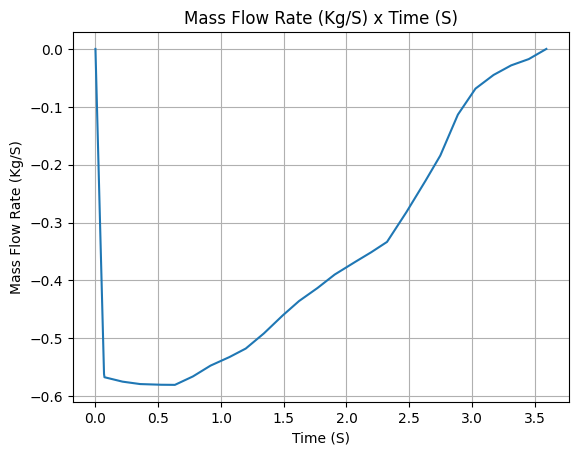

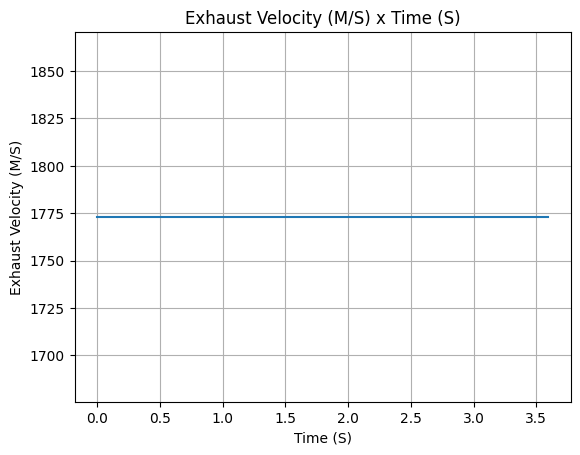

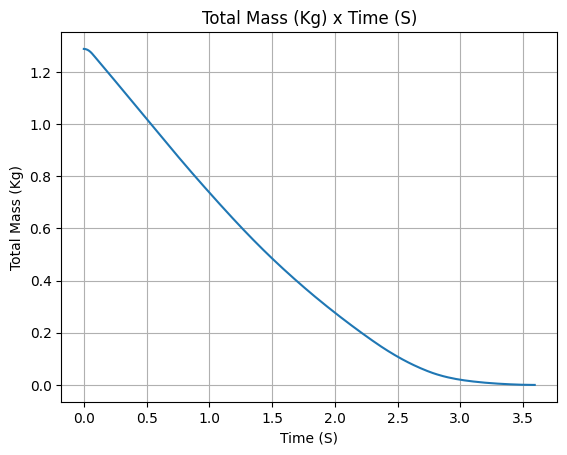

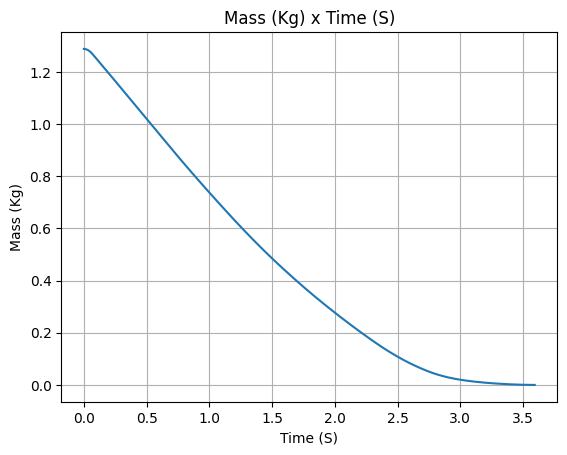

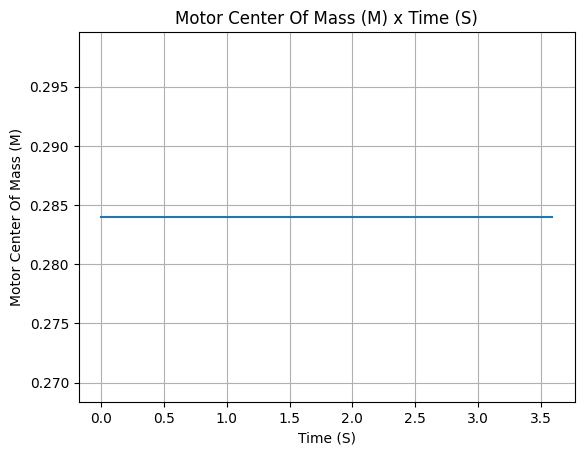

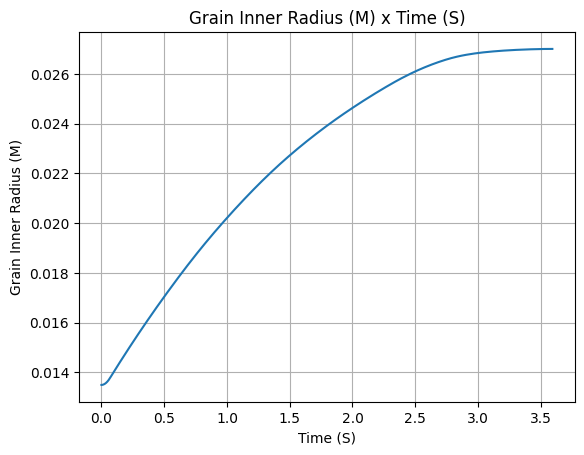

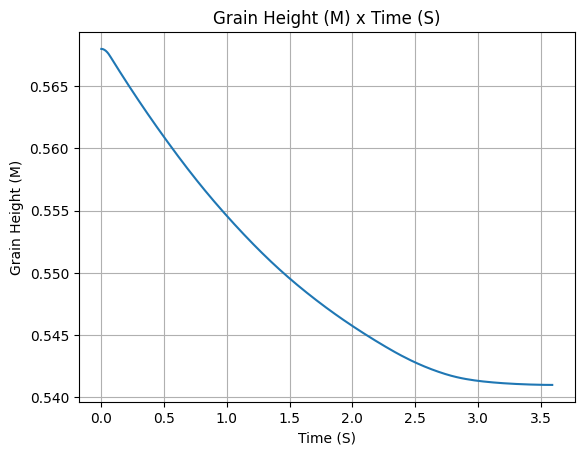

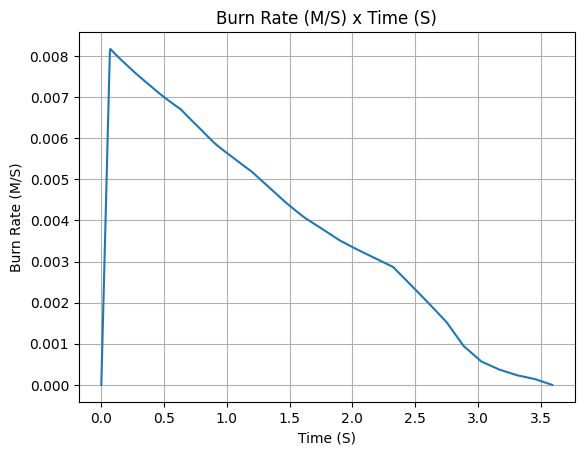

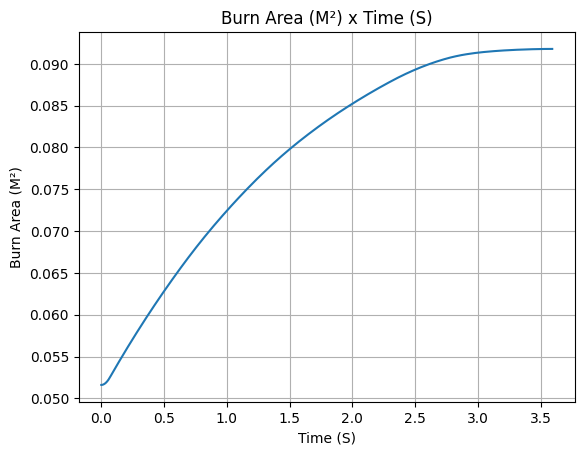

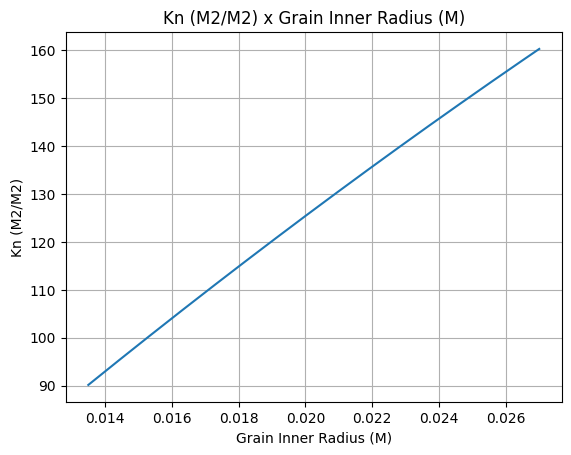

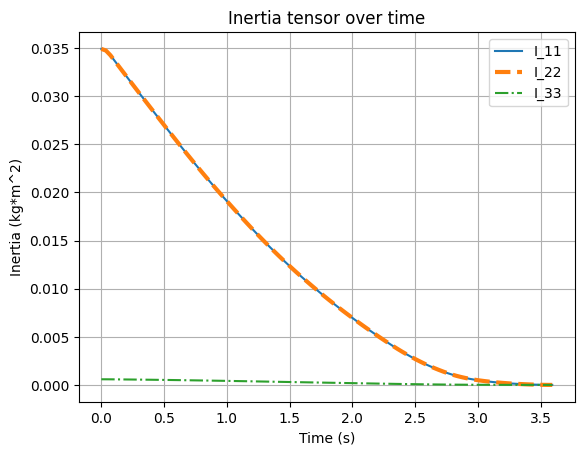

In [64]:
motor.all_info()

### Nosecones


In [50]:
nosecone = NoseCone(
    length=0.381,
    kind="Von Karman",
    base_radius=0.051053999999999995,
    rocket_radius=0.051053999999999995,
    name="0.381",
)

### Fins
As RocketPy allows for multiple fins sets, we will create a dictionary with all the fins sets and then add them to the rocket


In [51]:
trapezoidal_fins = {}

In [52]:
trapezoidal_fins[0] = TrapezoidalFins(
    n=4,
    root_chord=0.1008,
    tip_chord=0.05,
    span=0.1016,
    cant_angle=0.0,
    sweep_length=0.05489895944181254,
    sweep_angle=None,
    rocket_radius=0.051053999999999995,
    name="Trapezoidal Fin Set",
)

### Transitions (Tails)
As RocketPy allows for multiple tails, we will create a dictionary with all the tails and then add them to the rocket


In [53]:
tails = {}

### Parachutes
As RocketPy allows for multiple parachutes, we will create a dictionary with all the parachutes and then add them to the rocket


In [54]:
parachutes = {}

In [55]:
rocket = Rocket(
    radius=0.051053999999999995,
    mass=5.2,
    inertia=[0.011, 0.011, 2.115],
    power_off_drag= 0.5, # this number needs to change
    power_on_drag= 0.5,  # this number needs to change
    center_of_mass_without_motor=1.275,
    coordinate_system_orientation="nose_to_tail",
)

### Surfaces and Parachutes

In [56]:
rocket.add_surfaces(surfaces=[nosecone, trapezoidal_fins[0]], positions=[0.0, 2.1852])

In [57]:
rocket.add_motor(motor, position=1.7888012422360255)

Adding parachutes to the rocket


In [58]:
rocket.parachutes = list(parachutes.values())

### Rail Buttons


No Rail Buttons were added to the rocket.

### Rocket Information



Inertia Details

Rocket Mass: 5.200 kg (without motor)
Rocket Dry Mass: 5.200 kg (with unloaded motor)
Rocket Loaded Mass: 6.488 kg
Rocket Inertia (with unloaded motor) 11: 0.011 kg*m2
Rocket Inertia (with unloaded motor) 22: 0.011 kg*m2
Rocket Inertia (with unloaded motor) 33: 2.115 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.051053999999999995 m
Rocket Frontal Area: 0.008189 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 0.514 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.798 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.158 m


Aerodynamics Lift Coefficient Derivatives

0.381 Lift Coefficient Derivative: 2.000/rad
Trapezoidal Fin Set Lift Coefficient Derivative: 7.763/rad

Center of Pressure

0.381 Center of P

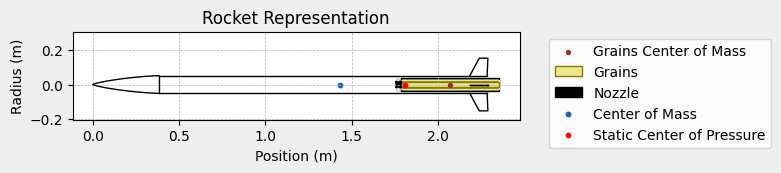


Mass Plots
----------------------------------------


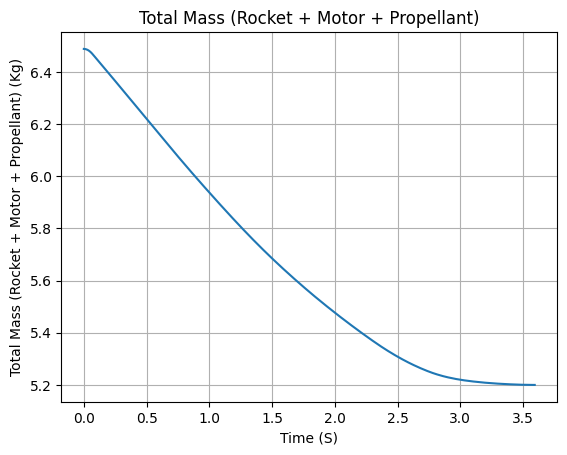

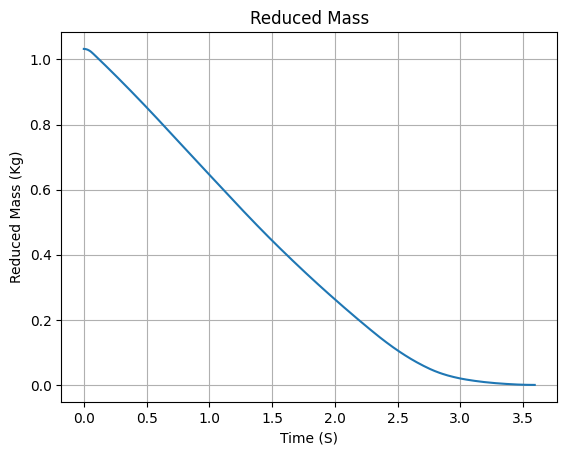


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


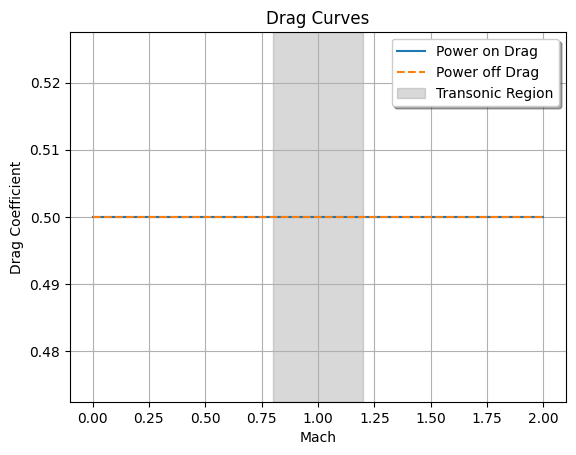


Stability Plots
--------------------


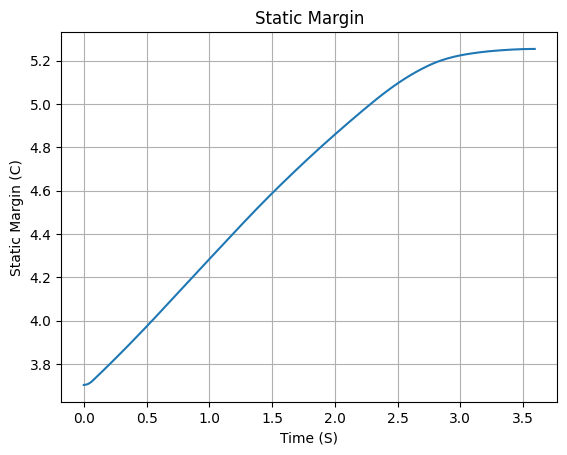

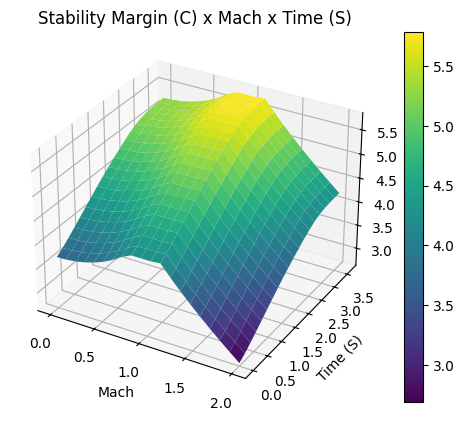


Thrust-to-Weight Plot
----------------------------------------


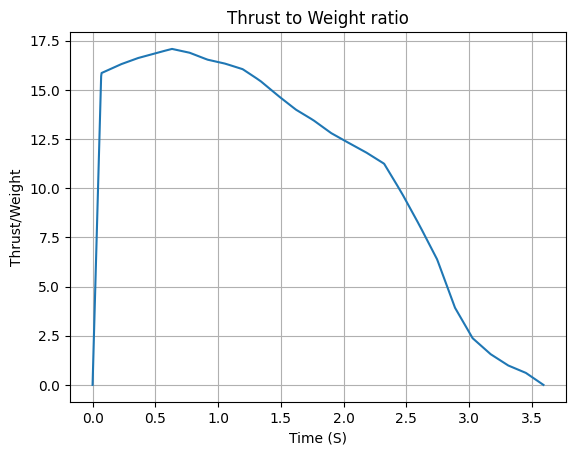

In [59]:
### Rocket Info
rocket.all_info()

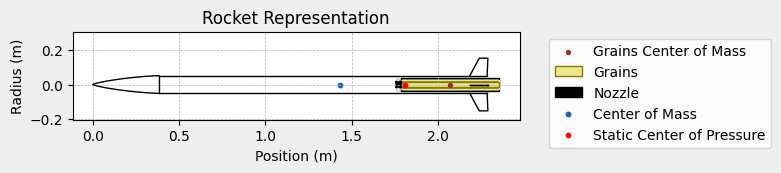

In [60]:
rocket.draw()

## Flight
We will now create the flight simulation. Let's go!


In [61]:
flight = Flight(
    rocket=rocket,
    environment=env,
    rail_length=1.0,
    inclination=90.0,
    heading=90.0,
    terminate_on_apogee=False,
    max_time=600,
)

In [62]:
flight.all_info()


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 2432.39 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.707 | e1: 0.000 | e2: 0.000 | e3: -0.707


c:\Users\Sigmond\AppData\Local\Programs\Python\Python312\Lib\site-packages\rocketpy\tools.py:1087: RuntimeWarning: invalid value encountered in arcsin
  return (180 / np.pi) * 2 * np.arcsin(-((e1**2 + e2**2) ** 0.5))


ValueError: array must not contain infs or NaNs

## Compare Results
We will now compare the results of the simulation with the parameters used to create it. Let's go!


In [ ]:
### OpenRocket vs RocketPy Parameters
time_to_apogee_ork = 19.979
time_to_apogee_rpy = flight.apogee_time
print(f"Time to apogee (OpenRocket): {time_to_apogee_ork:.3f} s")
print(f"Time to apogee (RocketPy):   {time_to_apogee_rpy:.3f} s")
apogee_difference = time_to_apogee_rpy - time_to_apogee_ork
error = abs((apogee_difference) / time_to_apogee_rpy) * 100
print(f"Time to apogee difference:   {error:.3f} %")
print()

flight_time_ork = 148.528
flight_time_rpy = flight.t_final
print(f"Flight time (OpenRocket): {flight_time_ork:.3f} s")
print(f"Flight time (RocketPy):   {flight_time_rpy:.3f} s")
flight_time_difference = flight_time_rpy - flight_time_ork
error_flight_time = abs((flight_time_difference) / flight_time_rpy) * 100
print(f"Flight time difference:   {error_flight_time:.3f} %")
print()

ground_hit_velocity_ork = -34.148
ground_hit_velocity_rpy = flight.impact_velocity
print(f"Ground hit velocity (OpenRocket): {ground_hit_velocity_ork:.3f} m/s")
print(f"Ground hit velocity (RocketPy):   {ground_hit_velocity_rpy:.3f} m/s")
ground_hit_velocity_difference = ground_hit_velocity_rpy - ground_hit_velocity_ork
error_ground_hit_velocity = (
    abs((ground_hit_velocity_difference) / ground_hit_velocity_rpy) * 100
)
print(f"Ground hit velocity difference:   {error_ground_hit_velocity:.3f} %")
print()

launch_rod_velocity_ork = 17.267
launch_rod_velocity_rpy = flight.out_of_rail_velocity
print(f"Launch rod velocity (OpenRocket): {launch_rod_velocity_ork:.3f} m/s")
print(f"Launch rod velocity (RocketPy):   {launch_rod_velocity_rpy:.3f} m/s")
launch_rod_velocity_difference = launch_rod_velocity_rpy - launch_rod_velocity_ork
error_launch_rod_velocity = (
    abs((launch_rod_velocity_difference) / launch_rod_velocity_rpy) * 100
)
print(f"Launch rod velocity difference:   {error_launch_rod_velocity:.3f} %")
print()

max_acceleration_ork = 154.58
max_acceleration_rpy = flight.max_acceleration
print(f"Max acceleration (OpenRocket): {max_acceleration_ork:.3f} m/s²")
print(f"Max acceleration (RocketPy):   {max_acceleration_rpy:.3f} m/s²")
max_acceleration_difference = max_acceleration_rpy - max_acceleration_ork
error_max_acceleration = abs((max_acceleration_difference) / max_acceleration_rpy) * 100
print(f"Max acceleration difference:   {error_max_acceleration:.3f} %")
print()

max_altitude_ork = 2357.656
max_altitude_rpy = flight.apogee - flight.env.elevation
print(f"Max altitude (OpenRocket): {max_altitude_ork:.3f} m")
print(f"Max altitude (RocketPy):   {max_altitude_rpy:.3f} m")
max_altitude_difference = max_altitude_rpy - max_altitude_ork
error_max_altitude = abs((max_altitude_difference) / max_altitude_rpy) * 100
print(f"Max altitude difference:   {error_max_altitude:.3f} %")
print()

max_mach_ork = 0.867
max_mach_rpy = flight.max_mach_number
print(f"Max Mach (OpenRocket): {max_mach_ork:.3f}")
print(f"Max Mach (RocketPy):   {max_mach_rpy:.3f}")
max_mach_difference = max_mach_rpy - max_mach_ork
error_max_mach = abs((max_mach_difference) / max_mach_rpy) * 100
print(f"Max Mach difference:   {error_max_mach:.3f} %")
print()

max_velocity_ork = 293.259
max_velocity_rpy = flight.max_speed
print(f"Max velocity (OpenRocket): {max_velocity_ork:.3f} m/s")
print(f"Max velocity (RocketPy):   {max_velocity_rpy:.3f} m/s")
max_velocity_difference = max_velocity_rpy - max_velocity_ork
error_max_velocity = abs((max_velocity_difference) / max_velocity_rpy) * 100
print(f"Max velocity difference:   {error_max_velocity:.3f} %")
print()

max_thrust_ork = 1029.181
max_thrust_rpy = flight.rocket.motor.thrust.max
print(f"Max thrust (OpenRocket): {max_thrust_ork:.3f} N")
print(f"Max thrust (RocketPy):   {max_thrust_rpy:.3f} N")
max_thrust_difference = max_thrust_rpy - max_thrust_ork
error_max_thrust = abs((max_thrust_difference) / max_thrust_rpy) * 100
print(f"Max thrust difference:   {error_max_thrust:.3f} %")
print()

burnout_stability_margin_ork = 4.025
burnout_stability_margin_rpy = flight.stability_margin(
    flight.rocket.motor.burn_out_time
)
print(f"Burnout stability margin (OpenRocket): {burnout_stability_margin_ork:.3f}")
print(f"Burnout stability margin (RocketPy):   {burnout_stability_margin_rpy:.3f}")
burnout_stability_margin_difference = (
    burnout_stability_margin_rpy - burnout_stability_margin_ork
)
error_burnout_stability_margin = (
    abs((burnout_stability_margin_difference) / burnout_stability_margin_rpy) * 100
)
print(f"Burnout stability margin difference:   {error_burnout_stability_margin:.3f} %")
print()

max_stability_margin_ork = 6.589
max_stability_margin_rpy = flight.max_stability_margin
print(f"Max stability margin (OpenRocket): {max_stability_margin_ork:.3f}")
print(f"Max stability margin (RocketPy):   {max_stability_margin_rpy:.3f}")
max_stability_margin_difference = max_stability_margin_rpy - max_stability_margin_ork
error_max_stability_margin = (
    abs((max_stability_margin_difference) / max_stability_margin_rpy) * 100
)
print(f"Max stability margin difference:   {error_max_stability_margin:.3f} %")
print()

min_stability_margin_ork = 0.403
min_stability_margin_rpy = flight.min_stability_margin
print(f"Min stability margin (OpenRocket): {min_stability_margin_ork:.3f}")
print(f"Min stability margin (RocketPy):   {min_stability_margin_rpy:.3f}")
min_stability_margin_difference = min_stability_margin_rpy - min_stability_margin_ork
error_min_stability_margin = (
    abs((min_stability_margin_difference) / min_stability_margin_rpy) * 100
)
print(f"Min stability margin difference:   {error_min_stability_margin:.3f} %")
print()

Time to apogee (OpenRocket): 19.979 s
Time to apogee (RocketPy):   22.089 s
Time to apogee difference:   9.550 %

Flight time (OpenRocket): 148.528 s
Flight time (RocketPy):   49.826 s
Flight time difference:   198.096 %

Ground hit velocity (OpenRocket): -34.148 m/s
Ground hit velocity (RocketPy):   -155.470 m/s
Ground hit velocity difference:   78.036 %

Launch rod velocity (OpenRocket): 17.267 m/s
Launch rod velocity (RocketPy):   16.892 m/s
Launch rod velocity difference:   2.222 %

Max acceleration (OpenRocket): 154.580 m/s²
Max acceleration (RocketPy):   155.169 m/s²
Max acceleration difference:   0.379 %

Max altitude (OpenRocket): 2357.656 m
Max altitude (RocketPy):   2818.032 m
Max altitude difference:   16.337 %

Max Mach (OpenRocket): 0.867
Max Mach (RocketPy):   0.930
Max Mach difference:   6.798 %

Max velocity (OpenRocket): 293.259 m/s
Max velocity (RocketPy):   309.588 m/s
Max velocity difference:   5.275 %

Max thrust (OpenRocket): 1029.181 N
Max thrust (RocketPy):   10